импорты и константы

In [2]:
import os
import numpy as np
from natsort import natsorted
import matplotlib.pyplot as plt
import re
import shutil
import time

# 153.8336486816406250 884.2712384333286764    измеряемый диапазон. 0-2136 диапазон данных
start = 400  # нм
end = 700  # нм
step = (884.2712384333286764 - 153.8336486816406250) / 2136

# номера точек в массиве по координате х
start_point = round((start - 153.8336486816406250) / step)
end_point = start_point + int((end - start) / step)


функции получения данных

In [3]:
def get_max_rmr(path, fl):
    _dm = np.zeros(len(fl))
    _start = start_point + 11
    _end = start_point + round((end_point - start_point) / 2)
    for i in range(len(fl)):
        with open(path + fl[i], "r", encoding="utf8") as spec:
            _dm[i] = max(re.split(",", spec.read())[_start:_end])
    return _dm

In [18]:
main_folder = r"C:\Users\Nik\Desktop\prog\20к"
main_folder = main_folder.replace(chr(92), "/")
main_folder +='/'
print(main_folder)
file_list = np.array(natsorted(os.listdir(main_folder)))[:-1]

C:/Users/Nik/Desktop/prog/20к/


получение максимумов из спектров

In [4]:
data_max = []  # изанчальные графики
main_folder = r"C:\Users\Nik\Desktop\prog\20к"
main_folder = main_folder.replace(chr(92), "/")
main_folder +='/'
print(main_folder)
file_list = np.array(natsorted(os.listdir(main_folder)))[:-1]
data_max = get_max_rmr(main_folder, file_list)
print("получено " + str(len(data_max)) + " максимумов спектров")


C:/Users/Nik/Desktop/prog/20к/
получено 20850 максимумов спектров


максимумы на таймлайнах

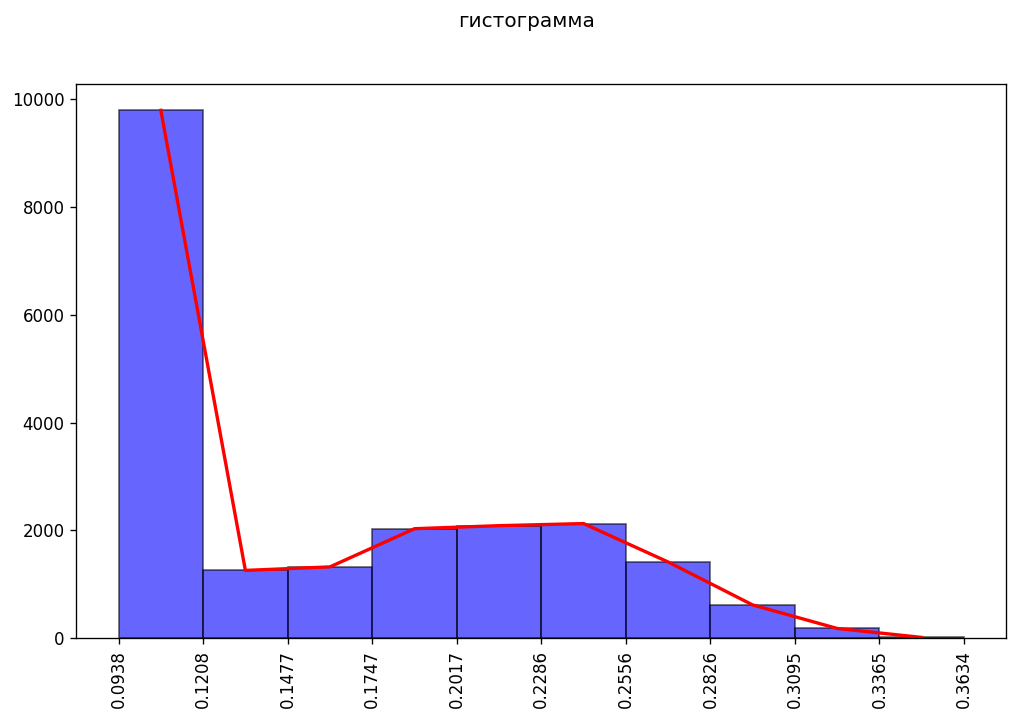

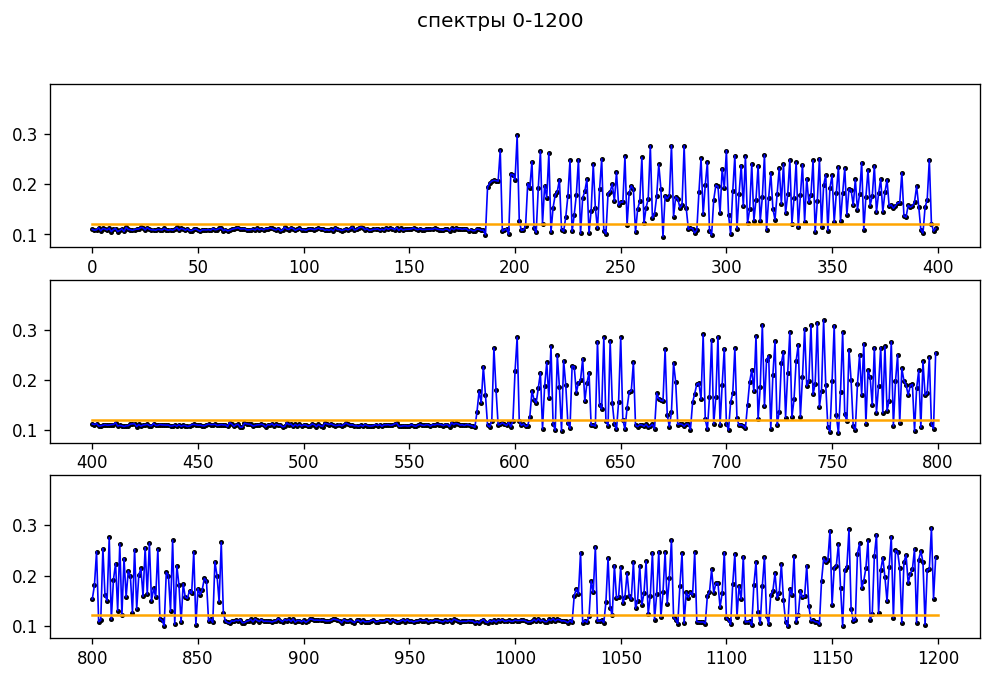

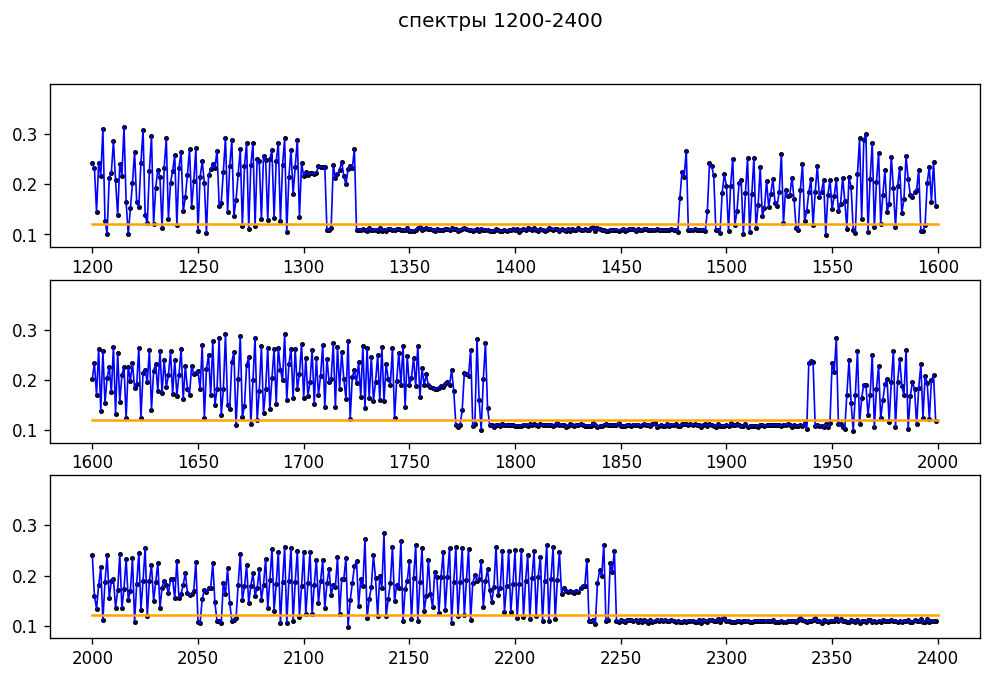

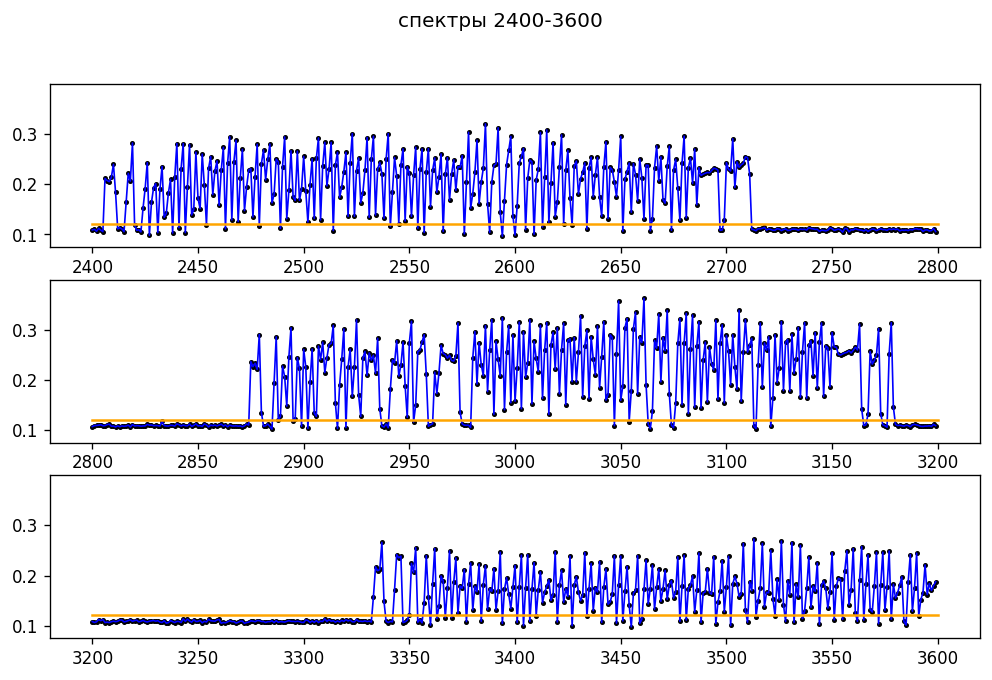

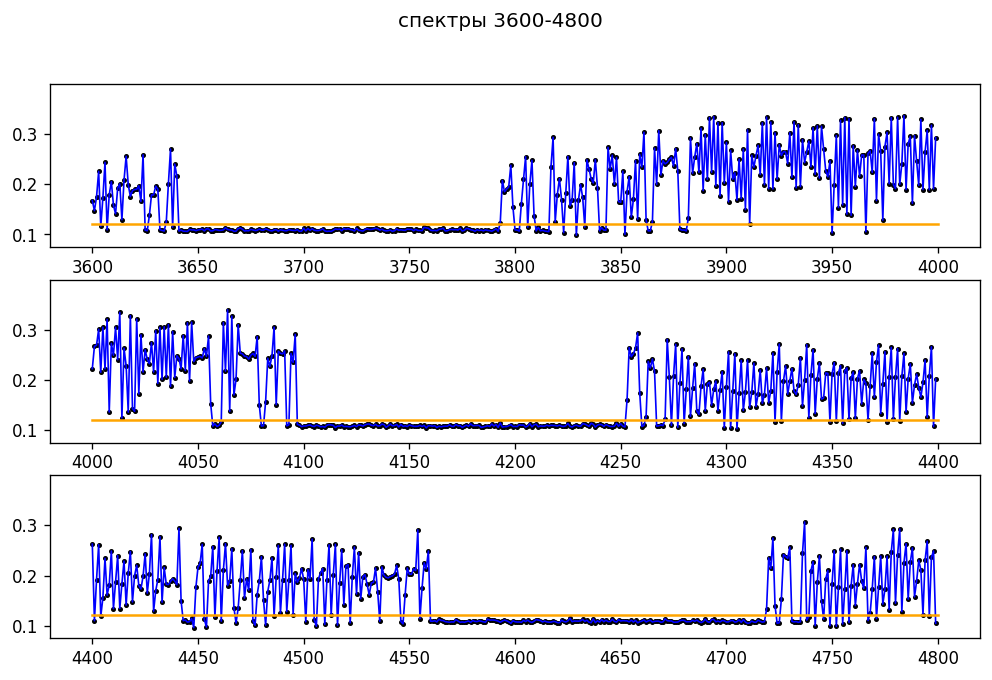

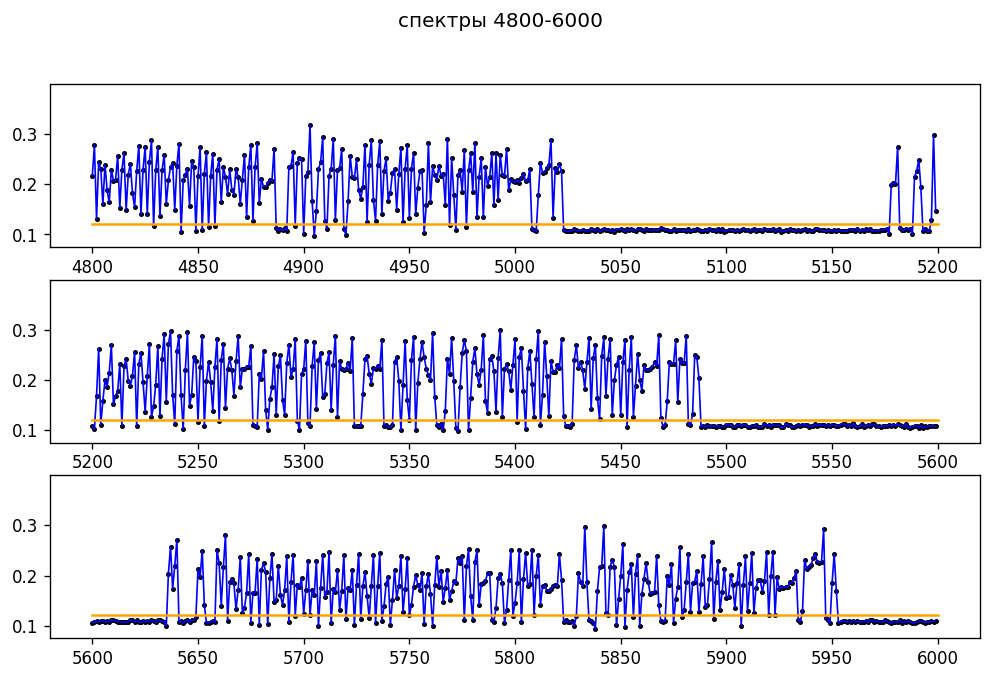

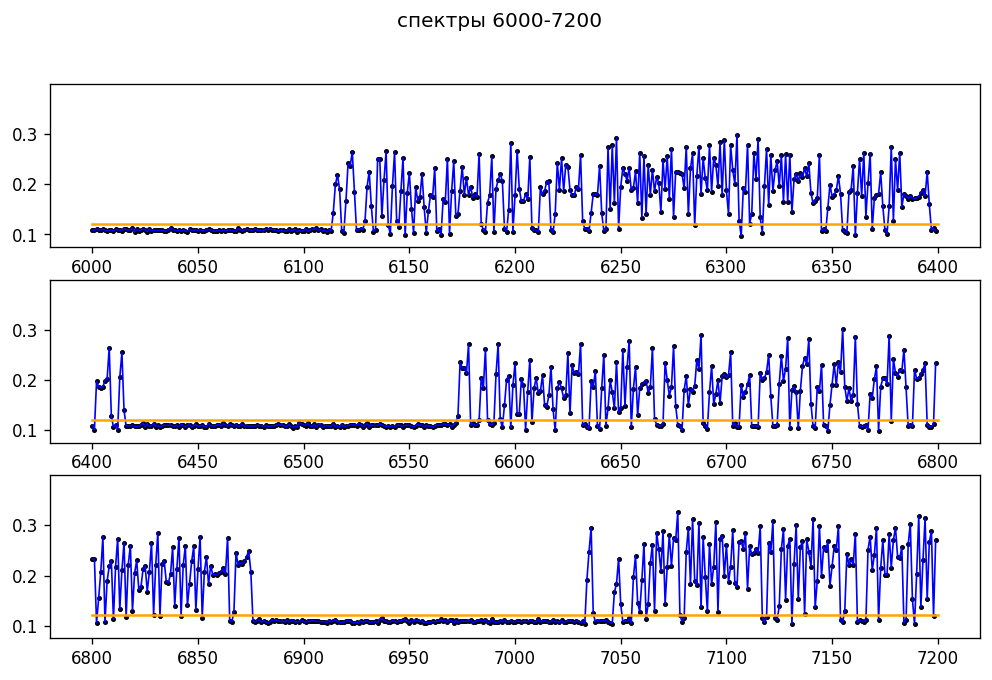

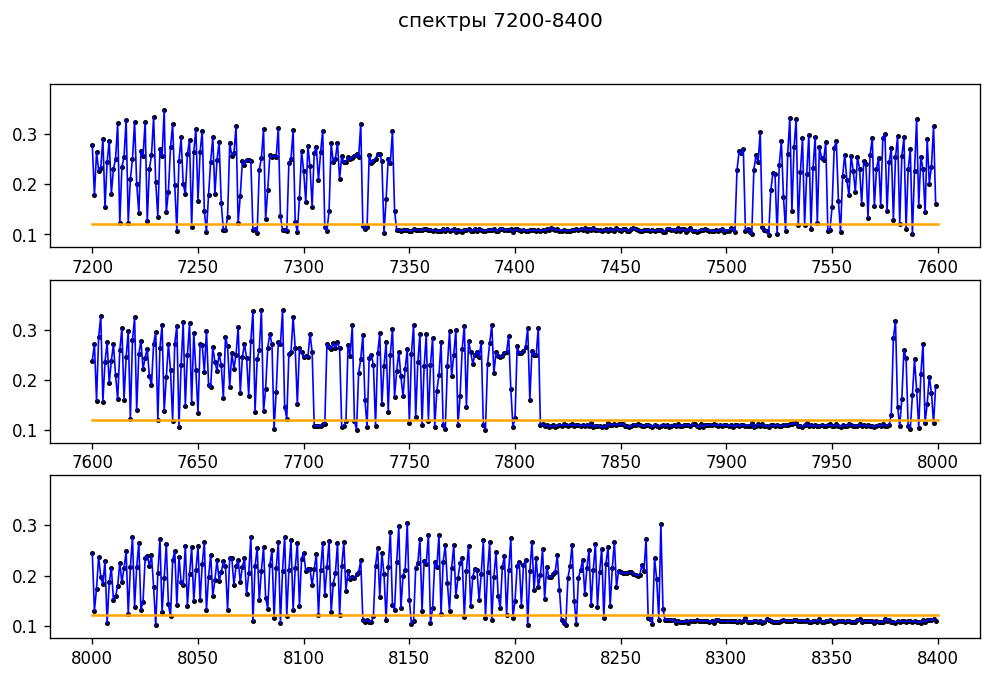

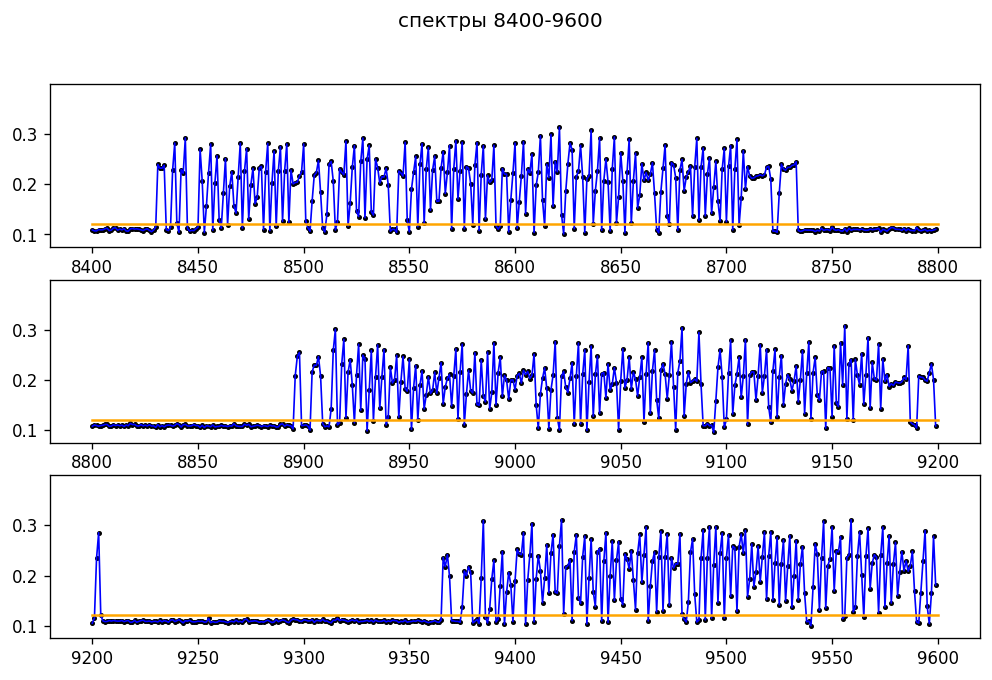

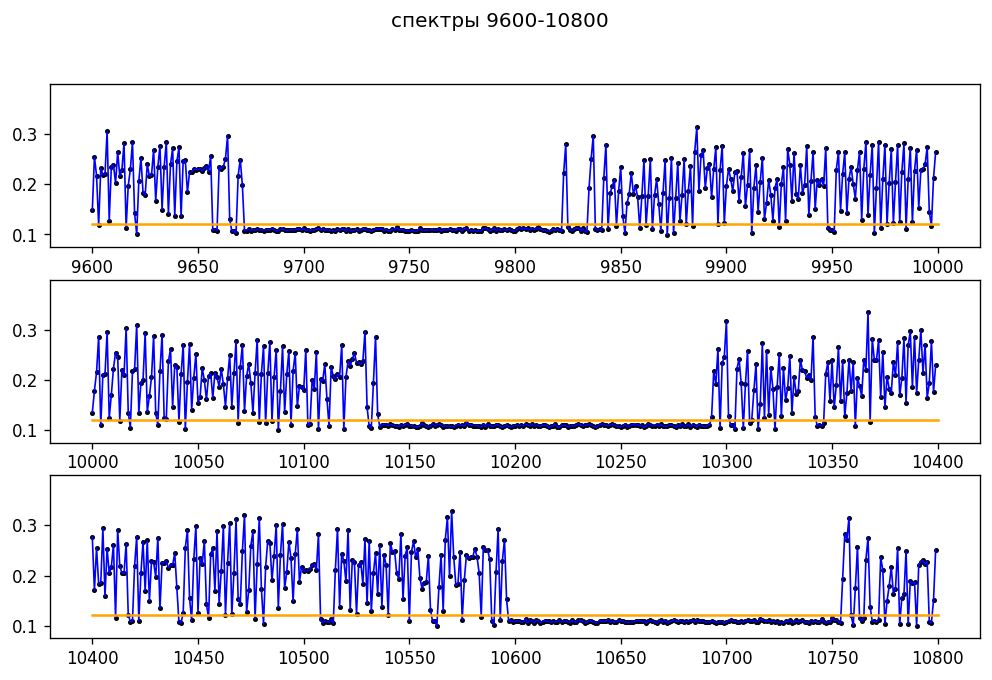

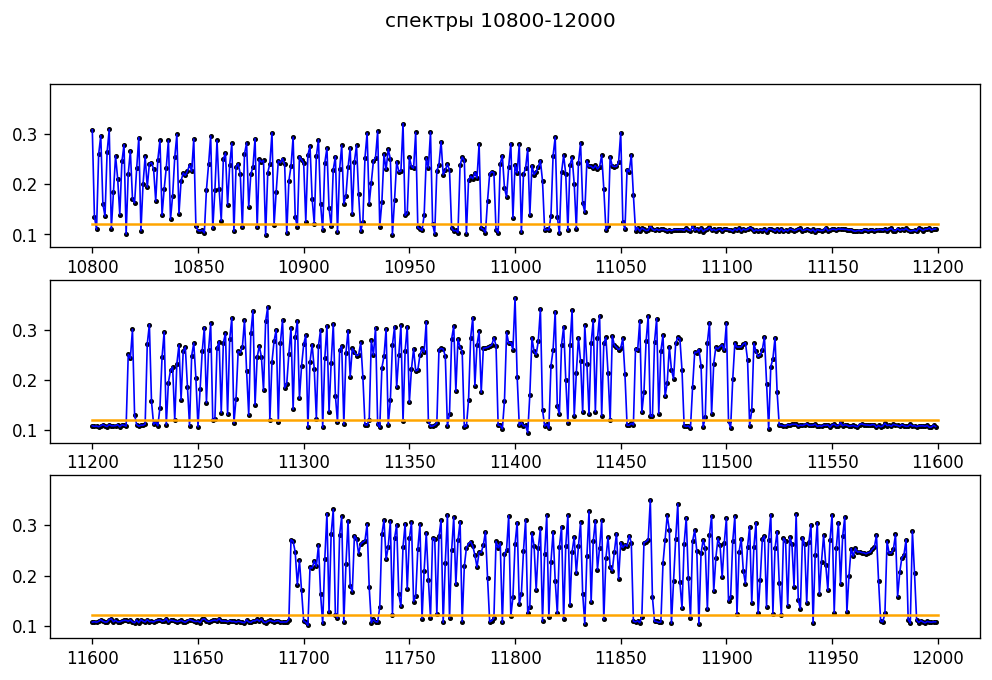

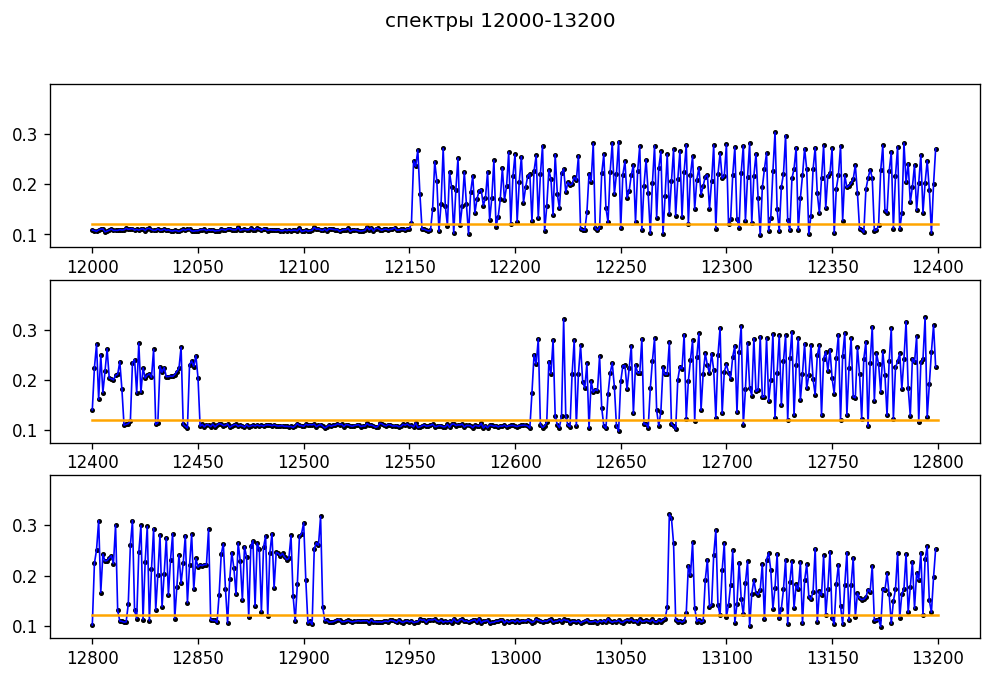

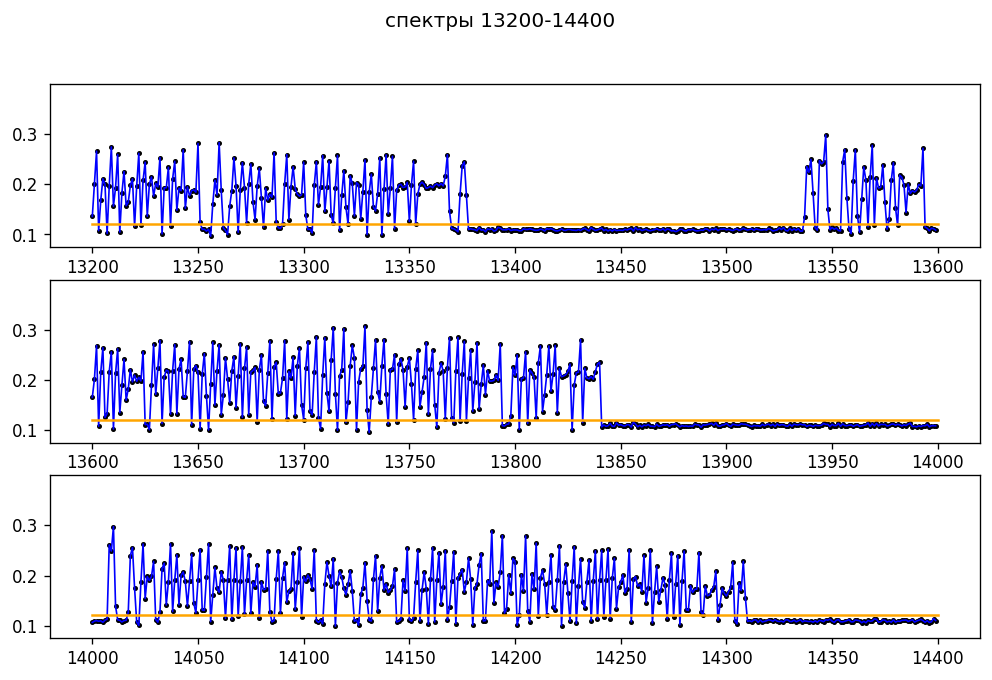

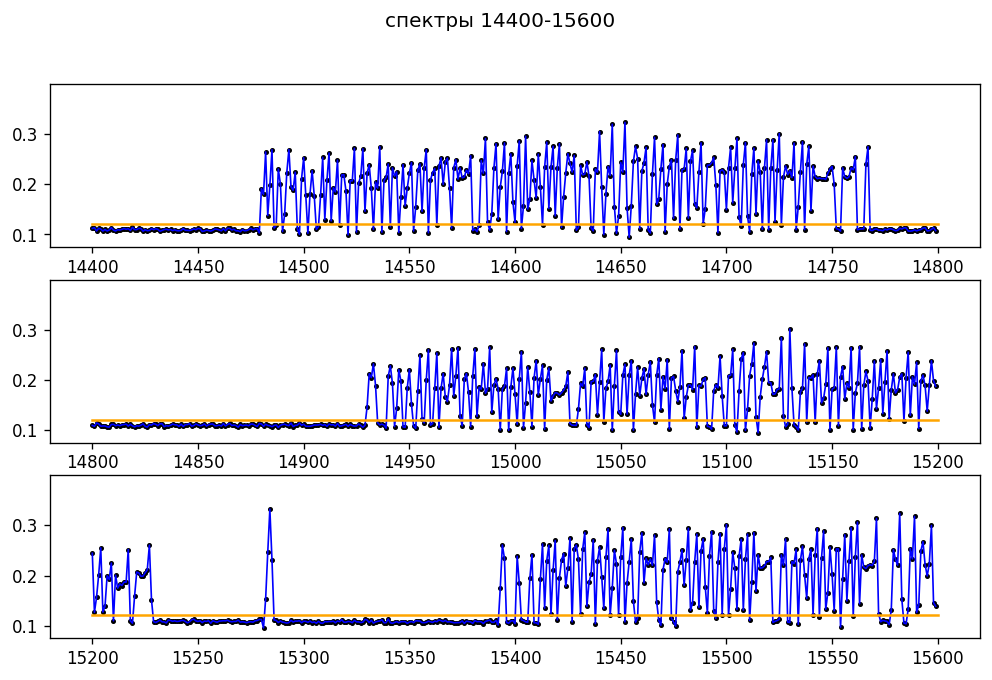

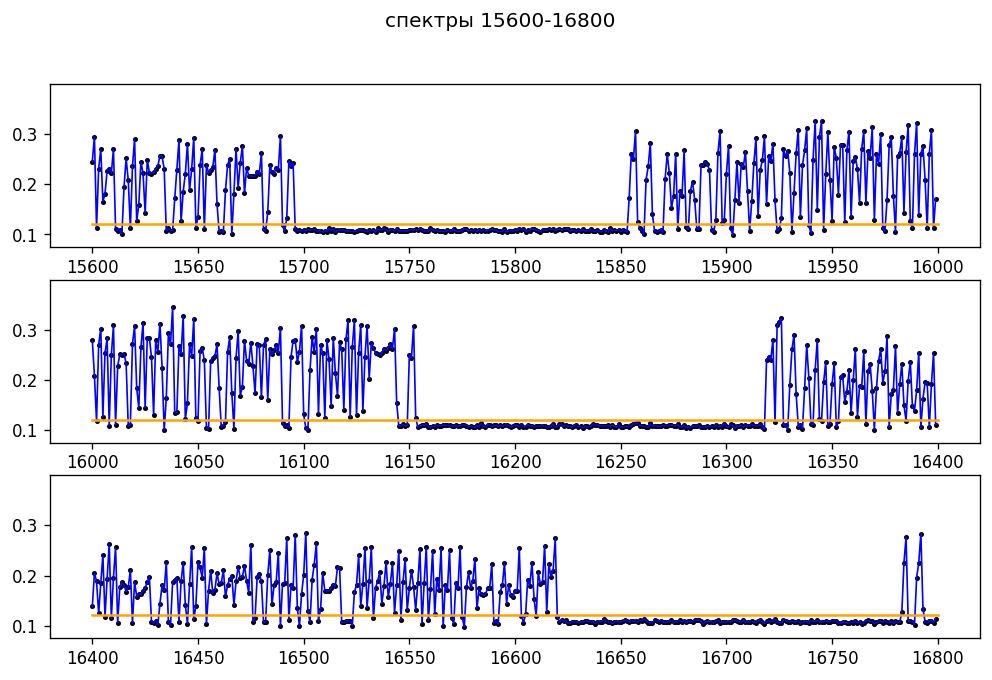

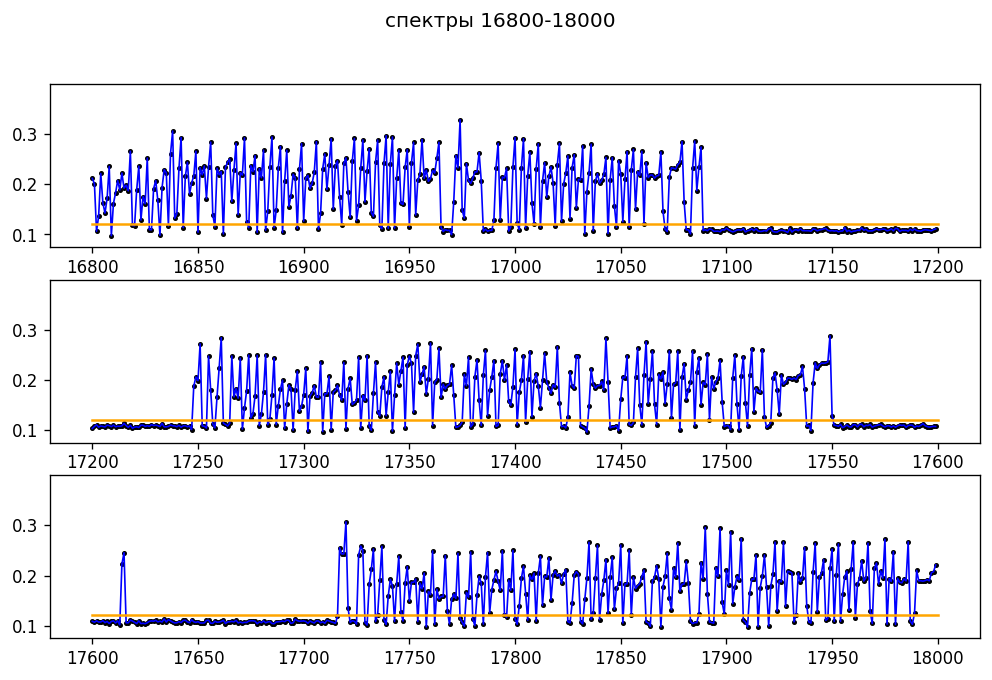

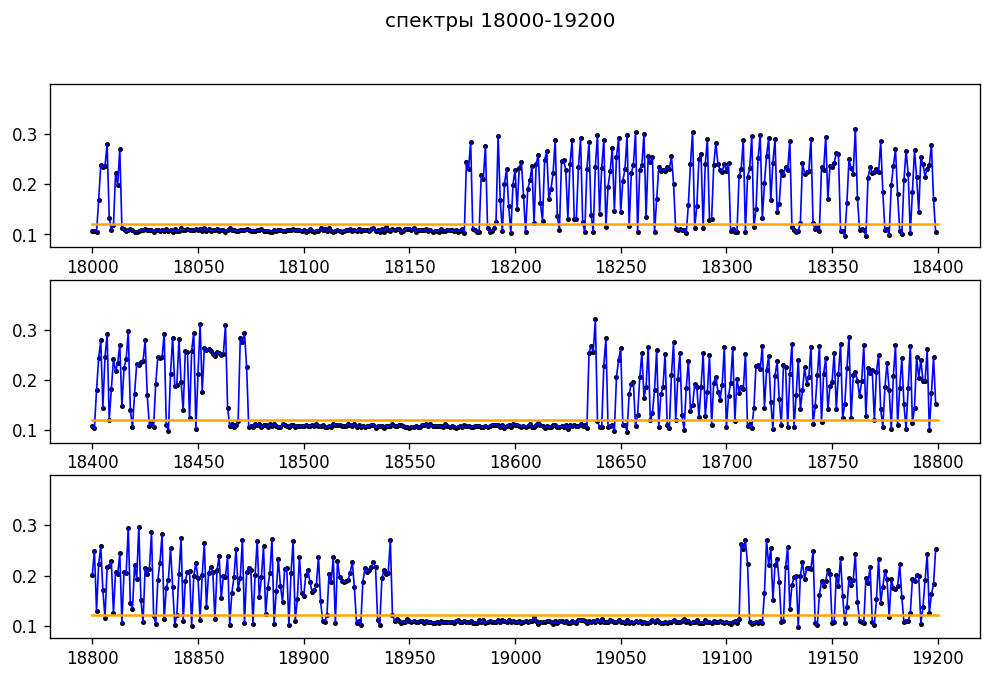

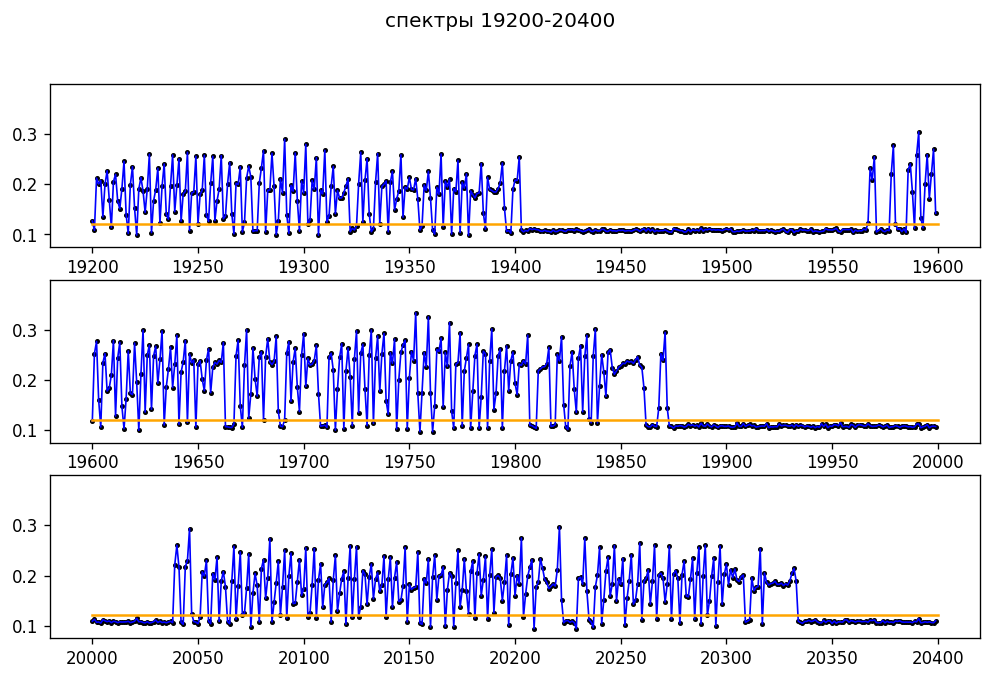

In [11]:
_step = 400
_sp = 0
_ep = _step

# создание папки для сохранения картинок
script_path = os.path.dirname(os.path.abspath("sorter.ipynb"))
folder_name = "timelines"
if not os.path.exists(os.path.join(script_path, folder_name)):
    os.makedirs(os.path.join(script_path, folder_name))

# расчет гистограммы
num_bins = 10  # количество интервалов
range_values = (np.max(data_max) - np.min(data_max)) / num_bins
# границы интервалов
bin_edges = np.arange(np.min(data_max), np.max(data_max) + range_values, range_values)
# середины интервалов
bins = bin_edges[:-1] + range_values / 2

hist, _ = np.histogram(data_max, bins=bin_edges)

zero=bin_edges[np.argmax(hist)+1]
fig, ax = plt.subplots(figsize=(10, 6), dpi=120)
fig.suptitle("гистограмма")
ax.hist(data_max, bin_edges, alpha=0.6, color="blue", edgecolor="k", linewidth=1)
ax.plot(bins, hist, color="red", lw=2)
plt.xticks(rotation=90)
ax.set_xticks(bin_edges)
plt.savefig(script_path + "/" + folder_name + "/" + "гистограмма.png")

m=np.min(data_max)*0.8
m2=np.max(data_max)*1.1

for i in range(round(len(data_max) / (3 * _step))):
    fig, axs = plt.subplots(3, 1, figsize=(10, 6), dpi=120)
    _s = _sp
    for j in range(3):
        if _ep > len(data_max):
            _ep = len(data_max)
        axs[j].plot(np.arange(_sp, _ep, 1), data_max[_sp:_ep], lw=1, color="blue")
        axs[j].scatter(np.arange(_sp, _ep, 1), data_max[_sp:_ep], s=4, color="black")
        axs[j].plot((_sp,_ep),(zero,zero),color="orange")
        axs[j].set_ylim(m, m2)
        _sp += _step
        _ep += _step

    _e = _ep - _step
    fig.suptitle("спектры " + str(_s) + "-" + str(_e))
    plt.savefig(
        script_path
        + "/"
        + folder_name
        + "/"
        + "ряд максимумов "
        + str(_s)
        + "-"
        + str(_e)
        + ".png"
    )

In [12]:
point_index=[]
_point=False
k=[]
for i in range(0,len(data_max),50):
    ar=np.mean(data_max[i:i+50])
    if ar>zero:
        k.append(i)
        _point=True
    if ar<zero and _point==True:
        point_index.append((k[0],i))   
        k=[]
        _point=False
    if _point==True and i>=len(data_max)-20:
        point_index.append((k[0],len(data_max)-1))   
print(len(point_index))
print(point_index)


45
[(150, 400), (550, 900), (1000, 1350), (1450, 1800), (1950, 2250), (2400, 2750), (2850, 3200), (3300, 3650), (3800, 4100), (4250, 4600), (4700, 5050), (5150, 5500), (5650, 5950), (6100, 6450), (6550, 6900), (7000, 7350), (7500, 7850), (7950, 8300), (8400, 8750), (8900, 9200), (9350, 9700), (9800, 10150), (10250, 10600), (10750, 11100), (11200, 11550), (11650, 12000), (12150, 12450), (12600, 12950), (13050, 13400), (13500, 13850), (14000, 14350), (14450, 14800), (14900, 15250), (15400, 15700), (15850, 16150), (16300, 16650), (16750, 17100), (17250, 17550), (17700, 18050), (18150, 18500), (18600, 18950), (19100, 19400), (19550, 19900), (20000, 20350), (20500, 20800)]


In [14]:
for i in range(len(point_index)):
    print(point_index[i], '   ',point_index[i][1]-point_index[i][0])

(150, 400)     250
(550, 900)     350
(1000, 1350)     350
(1450, 1800)     350
(1950, 2250)     300
(2400, 2750)     350
(2850, 3200)     350
(3300, 3650)     350
(3800, 4100)     300
(4250, 4600)     350
(4700, 5050)     350
(5150, 5500)     350
(5650, 5950)     300
(6100, 6450)     350
(6550, 6900)     350
(7000, 7350)     350
(7500, 7850)     350
(7950, 8300)     350
(8400, 8750)     350
(8900, 9200)     300
(9350, 9700)     350
(9800, 10150)     350
(10250, 10600)     350
(10750, 11100)     350
(11200, 11550)     350
(11650, 12000)     350
(12150, 12450)     300
(12600, 12950)     350
(13050, 13400)     350
(13500, 13850)     350
(14000, 14350)     350
(14450, 14800)     350
(14900, 15250)     350
(15400, 15700)     300
(15850, 16150)     300
(16300, 16650)     350
(16750, 17100)     350
(17250, 17550)     300
(17700, 18050)     350
(18150, 18500)     350
(18600, 18950)     350
(19100, 19400)     300
(19550, 19900)     350
(20000, 20350)     350
(20500, 20800)     300


In [15]:
folder_name = "points"
if os.path.exists(os.path.join(script_path, folder_name)):
    shutil.rmtree(script_path+'/'+folder_name)
os.makedirs(os.path.join(script_path, folder_name))
for i in range(len(point_index)):
    os.makedirs(os.path.join(script_path+'/'+folder_name,"step "+str(i)))

In [20]:

print(script_path+'/'+str(file_list[1]))
for i in range(len(point_index)):
    dist=script_path+'/'+folder_name+"/step "+str(i)
    for j in range(point_index[i][0],point_index[i][1]):
        shutil.copy2(main_folder+str(file_list[j]), dist)
    print("step ",i,' ',point_index[i][1]-point_index[i][0])

        

c:\Users\Nik\Desktop\prog\mcfluidic/Absorbance__1__15-50-20-068.rmn
step  0   250
step  1   350
step  2   350
step  3   350
step  4   300
step  5   350
step  6   350
step  7   350
step  8   300
step  9   350
step  10   350
step  11   350
step  12   300
step  13   350
step  14   350
step  15   350
step  16   350
step  17   350
step  18   350
step  19   300
step  20   350
step  21   350
step  22   350
step  23   350
step  24   350
step  25   350
step  26   300
step  27   350
step  28   350
step  29   350
step  30   350
step  31   350
step  32   350
step  33   300
step  34   300
step  35   350
step  36   350
step  37   300
step  38   350
step  39   350
step  40   350
step  41   300
step  42   350
step  43   350
step  44   300
